## Loading library

*Tensor Flow* library is a requirement to Keras. To install it do: `pip3 install tensorflow`.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.__version__

'2.5.0'

## Loading dataset using Pandas

In [3]:
import pandas as pd

In [4]:
data_train_file = 'data/fashion-mnist_train.csv.gz'
data_test_file = 'data/fashion-mnist_test.csv.gz'

# this method returns a pandas DataFrame object "pandas.core.frame.DataFrame"
data_train = pd.read_csv(data_train_file)
data_test = pd.read_csv(data_test_file)

print(data_train.shape)
data_train.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Treating data

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# This function slices a panda data frame into two arrays. The first with labels and the other with
# all samples and their features - one by line. 
def treat_raw_data_frame(data_frame):
    # data is normalized to the max valua a pixel can take (255) - Gray Scale
    # each sample is a 28x28 array serialized
    features = data_frame.values[:, 1:]/255

    # This normalization ([0-1]) can also be done by using sklearn
    scaler = MinMaxScaler(feature_range=(0,1))
    fatures = scaler.fit_transform(data_frame.values[:, 1:])
    
    labels = data_frame.label.values

    # transforming labels to "one-hot" encoding
    # if We use sparse_categorical_crossentropy we do not need to one-hot encoding our labels
#    labels = tf.keras.utils.to_categorical(labels)
    return shuffle(labels, features)

train_labels, train_features = treat_raw_data_frame(data_train)
test_labels, test_features = treat_raw_data_frame(data_test)

print("Shape of trainning feature dataset: {}".format(train_features.shape))
print("Shape of trainning labels dataset: {}".format(train_labels.shape))

Shape of trainning feature dataset: (60000, 784)
Shape of trainning labels dataset: (60000,)


In [6]:
train_features[0, 90:110]

array([0.        , 0.        , 0.        , 0.01568627, 0.        ,
       0.0627451 , 0.76862745, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.60392157, 0.49019608, 0.        ,
       0.02352941, 0.        , 0.        , 0.        , 0.        ])

## Visualizing samples using matplotlib

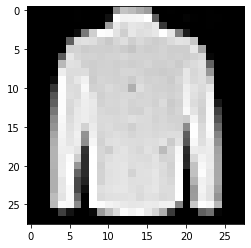

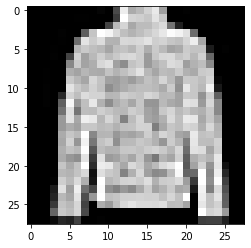

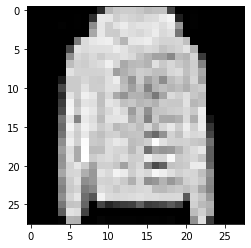

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This functions plots a sample rechape array into a 28x28 2 dimensional array
def plot(data_set, index):
    plt.figure()
    plt.imshow(np.reshape(data_set[index, :], (28,28)), "gray")


_count = 0
for i in range(len(train_labels)):
    if train_labels[i] == 4:
        plot(train_features, i)
        _count += 1
    if _count == 3:
        break


## Designing the Model

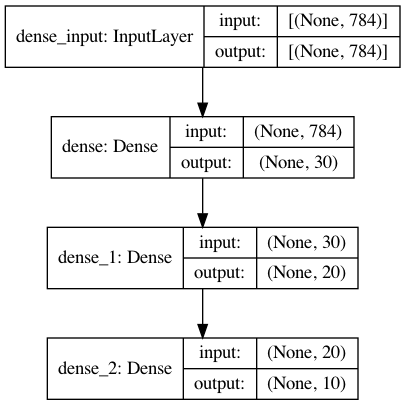

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Define a sequential model. This defines the way Keras will generate a model. Keras has three different
# type of models: sequential, functional and subclassing [3].
model = tf.keras.Sequential()

# Two hidden layers, activation function is rectified linear unit
# all activation functions can be found at [4]. [5] to read more about about
# Keras layers
model.add(tf.keras.layers.Dense(30, activation=tf.nn.relu, input_shape=(784,))) # 1st hidden layer
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))                     # 2nd hidden layer

# Output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # softmax gives probability to each class classes

# Keras provides resource for plotting the Neural Network architecture and parameters.
tf.keras.utils.plot_model(model, show_shapes=True)

## Trainning (fit), validating (validation_split param) and Testing (evaluate) the Model

In [9]:
# This specifies parameters for training the model and evaluate training progress
# to learn more about optimizers [9]
# model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# prints summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Trainning model == fit function
EPOCHS=10
BATCH_SIZE=128

# Using last 10% as validation set make sure data is suffled beforehand
model.fit(train_features, train_labels, validation_split=0.1, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/10
422/422 [==============================] - 1s 2ms/step - loss: 0.7352 - accuracy: 0.7539 - val_loss: 0.4824 - val_accuracy: 0.8303
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.4734 - accuracy: 0.8351 - val_loss: 0.4192 - val_accuracy: 0.8510
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.4298 - accuracy: 0.8496 - val_loss: 0.4139 - val_accuracy: 0.8568
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.4020 - accuracy: 0.8575 - val_loss: 0.3860 - val_accuracy: 0.8630
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3827 - accuracy: 0.8636 - val_loss: 0.3643 - val_accuracy: 0.8717
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8683 - val_loss: 0.3657 - val_accuracy: 0.8723
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.8728 - val_loss: 0.3514 - val_accuracy: 0.8758
Epoch 

In [11]:
# Validating model
test_loss, test_acc = model.evaluate(test_features, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8687


In [12]:
test_acc, test_loss

(0.8687000274658203, 0.3648955523967743)

## Confusion Matrix

In [13]:
# Helps to visualize mistakes in evaluating data.  
from sklearn.metrics import confusion_matrix
import itertools

[[823   1  21  50   1   4  90   0  10   0]
 [  1 975   3  16   1   1   3   0   0   0]
 [ 14   2 778  17 149   0  37   0   3   0]
 [ 21  11  12 908  31   2  14   0   1   0]
 [  1   2  50  27 900   0  17   0   3   0]
 [  0   0   0   0   0 915   0  45   8  32]
 [152   2  97  45 127   0 563   0  14   0]
 [  0   0   0   0   0  19   0 882   0  99]
 [  5   0   8   2   2   2   8   3 968   2]
 [  0   0   0   0   0   9   0  15   1 975]]


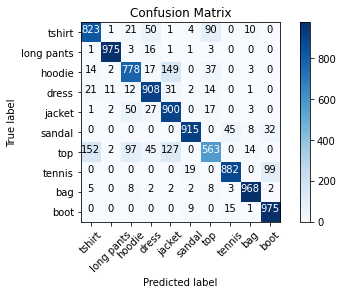

In [14]:
# This function was C&P from [10]
def plot_confusion_matrix(cm, classes,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true=test_labels, y_pred=model.predict(test_features, verbose=0).argmax(axis=-1))
print(cm)

cm_plot_labels = ["tshirt", "long pants", "hoodie", "dress", "jacket", "sandal", "top", "tennis", "bag", "boot"]
plot_confusion_matrix(cm, classes=cm_plot_labels, title="Confusion Matrix")

## Feeding one sample to model and getting prediction/classification

In [15]:
# Fetching sample from testing dataset
sample = test_features[21:22, :]

In [16]:
# Correct label for first sample in the testing dataset
test_labels[21:22]

array([1])

In [17]:
model.predict(sample)

array([[1.2560928e-07, 9.9995351e-01, 2.1577137e-07, 4.5364537e-05,
        6.4507373e-07, 1.1377071e-10, 3.4065607e-08, 5.2412408e-15,
        1.3256979e-09, 7.2263940e-12]], dtype=float32)

In [18]:
# Returns the index of the max value in the "one-hot" array
model.predict(sample).argmax(axis=-1)

array([1])

## <span style="color:red">[!]</span>  Problematic #001 <span style="color:red">[!]</span>

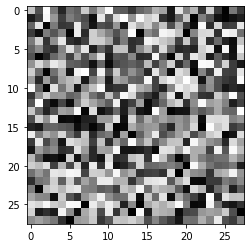

In [19]:
# Creating sample with random features
fake_sample = np.random.rand(*test_features[0:1, :].shape)
plt.figure()
_ = plt.imshow(np.reshape(fake_sample, (28,28)), "gray")

In [20]:
# Model try to fit random generated sample to some known category 
model.predict(fake_sample)

array([[4.0036434e-04, 7.8990078e-11, 1.4138789e-04, 3.7660744e-08,
        1.5083187e-07, 8.7345394e-14, 8.1060784e-07, 1.2364121e-16,
        9.9945730e-01, 5.0792009e-10]], dtype=float32)

In [21]:
model.predict(fake_sample).argmax()

8

## Saving/Loading model

In [22]:
# Serializes model in disk. The serialized format is a directory. [8]
model.save('example_001.h5')

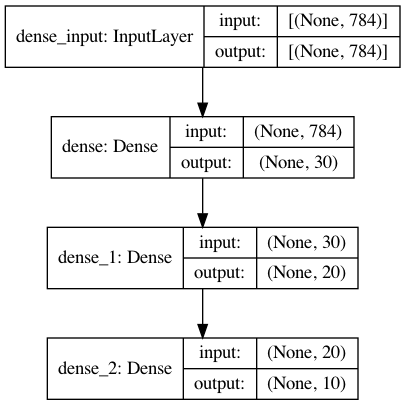

In [23]:
model_02 = keras.models.load_model('example_001.h5')
tf.keras.utils.plot_model(model_02, show_shapes=True)

In [24]:
# saves model's architecture to JSON (you can do the same to YAML)
model_arch_json = model.to_json()
model_arch_json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 30, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 20, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bi

In [25]:
model_03 = tf.keras.models.model_from_json(model_arch_json)
model_03.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [26]:
# it is possible also to only export weights. This can be useful in case low-cost 
# transfering trainning models that the architecture is known beforehand. 
model_02.save_weights('model_02_weights.h5')
model_03.load_weights('model_02_weights.h5')
print(model_03.get_weights()[0])
print(model_02.get_weights()[0])

[[-0.00038685  0.02368603 -0.0609418  ...  0.01627246 -0.07376067
  -0.07889044]
 [-0.1089149   0.14313117 -0.02884576 ...  0.01669067  0.09999301
  -0.12490407]
 [ 0.0664205   0.07086997 -0.18036419 ...  0.16650048  0.04709033
  -0.08547745]
 ...
 [-0.06224277 -0.02600387  0.04086712 ...  0.12218028  0.16073656
   0.12564567]
 [ 0.00260231 -0.10680392  0.02557778 ... -0.05494652 -0.06626508
   0.12875989]
 [-0.00685543 -0.09585844  0.09956078 ... -0.02346054  0.15009221
   0.10553617]]
[[-0.00038685  0.02368603 -0.0609418  ...  0.01627246 -0.07376067
  -0.07889044]
 [-0.1089149   0.14313117 -0.02884576 ...  0.01669067  0.09999301
  -0.12490407]
 [ 0.0664205   0.07086997 -0.18036419 ...  0.16650048  0.04709033
  -0.08547745]
 ...
 [-0.06224277 -0.02600387  0.04086712 ...  0.12218028  0.16073656
   0.12564567]
 [ 0.00260231 -0.10680392  0.02557778 ... -0.05494652 -0.06626508
   0.12875989]
 [-0.00685543 -0.09585844  0.09956078 ... -0.02346054  0.15009221
   0.10553617]]


## Convolutional Neural Networks

### Importing Libraries

In [27]:
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.applications.vgg16 as vgg16

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Checking Phsical Devices

In [28]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [29]:
tf.config.experimental.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### Treating/Loading Image Dataset

In [34]:
train_path = 'data/cats_vs_dogs/train'
valid_path = 'data/cats_vs_dogs/valid'
test_path = 'data/cats_vs_dogs/test'

train_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
train_batches = train_batches.flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
valid_batches = valid_batches.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
test_batches = test_batches.flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [31]:
# Grabing one single batch
imgs, labels = next(train_batches)

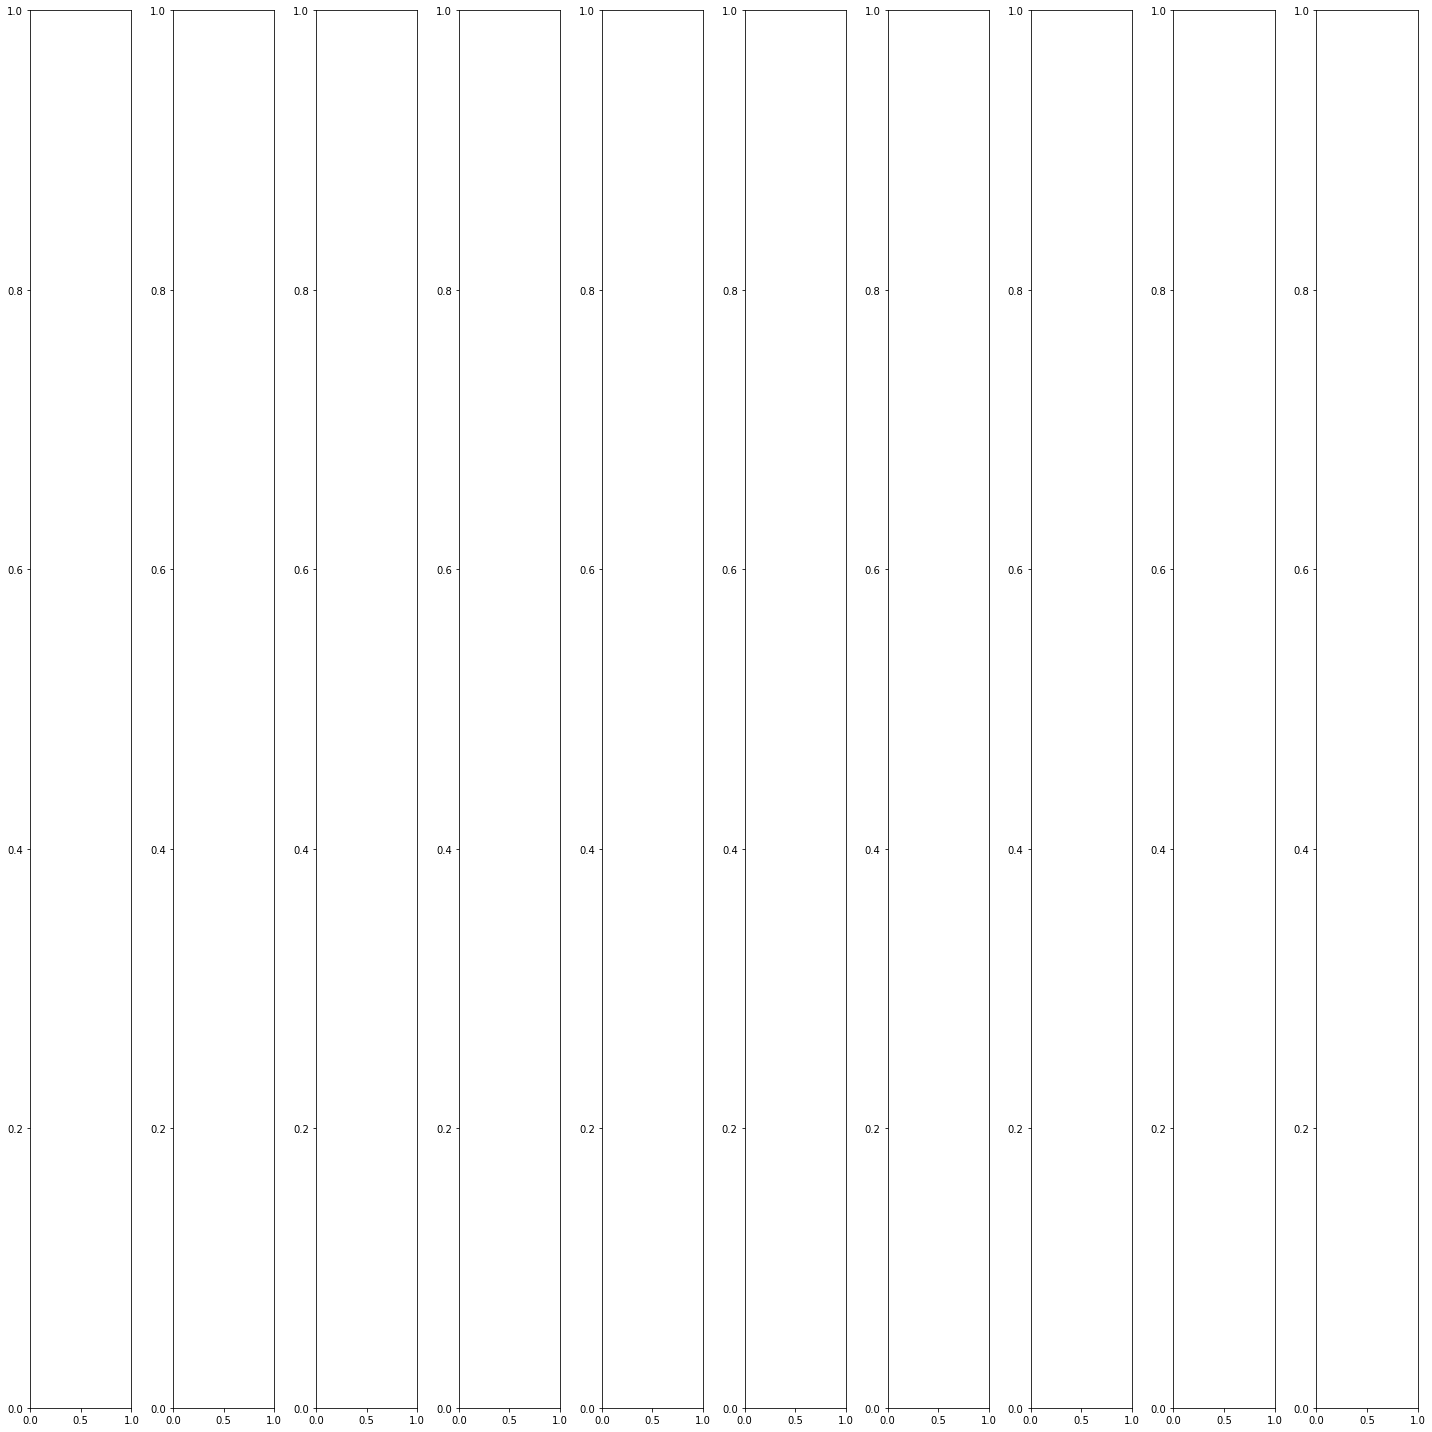

[]


In [33]:
# Auxiliar function for ploting sample
def plot(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot(imgs)
print(labels)

## References

1. https://www.tensorflow.org/guide/keras
1. https://www.kaggle.com/zalando-research/fashionmnist
1. https://keras.io/api/models/
1. https://keras.io/api/layers/activations/
1. https://www.tutorialspoint.com/keras/keras_layers.htm
1. https://www.youtube.com/watch?v=qFJeN9V1ZsI (****)
1. https://www.youtube.com/watch?v=J6Ok8p463C4 (****)
1. https://keras.io/guides/serialization_and_saving/
1. https://keras.io/api/optimizers/
1. https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
1. https://deeplizard.com/learn/video/RznKVRTFkBY (****)
1. https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c